# Week 6 - Lessons 27-32

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
sns.set_style('darkgrid')

# Lesson 28 - Least Squares Estimation

In [12]:
prop = pd.read_csv('propellant.csv')
prop.head()

,Sheer Strength (psi),age of propellant (weeks)
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
4,2207.50,5.50


In [5]:
x = prop['age of propellant (weeks)']
y = prop['Sheer Strength (psi)']

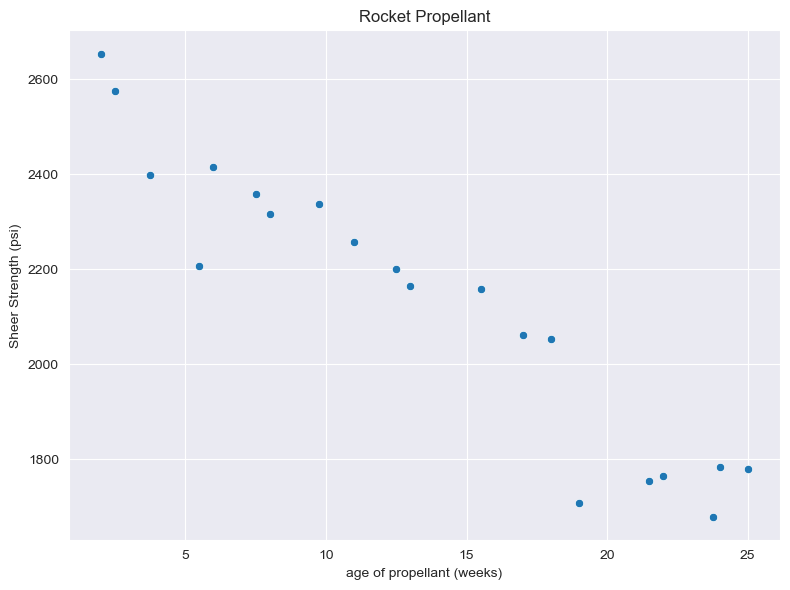

In [8]:
# visualize data
fig,ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=x, y=y, ax=ax)
ax.set_title('Rocket Propellant')
fig.tight_layout()

In [9]:
xbar = x.mean()
ybar = y.mean()

In [10]:
# sums of squares
SSxy = ((x-xbar)*(y-ybar)).sum()
SSxx = ((x-xbar)*(x-xbar)).sum()
print(f'SSxy: {SSxy:.0f}')
print(f'SSxx: {SSxx:.0f}')

SSxy: -41113
SSxx: 1107


In [11]:
beta1 = SSxy/SSxx
beta1

-37.15359094490523

In [12]:
beta0 = ybar - beta1 * xbar
beta0

2627.8223590012963

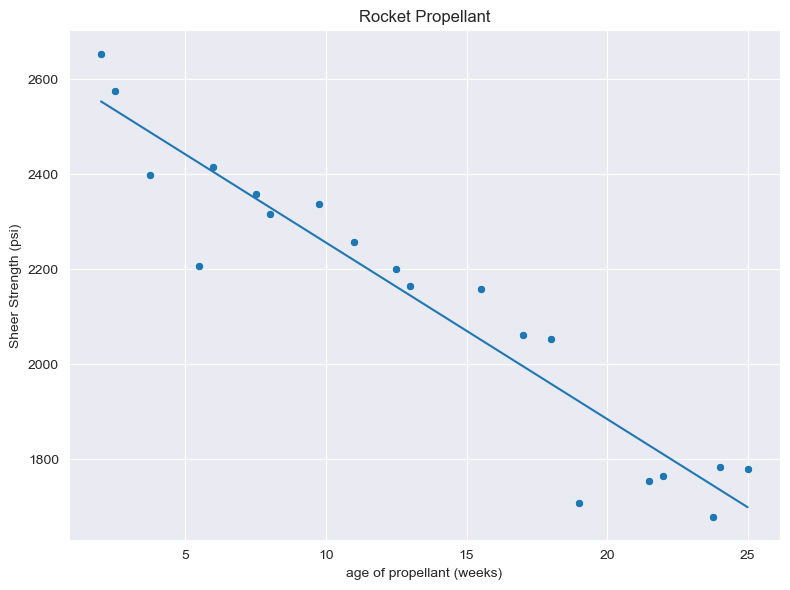

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=x, y=y, ax=ax)
ax.set_title('Rocket Propellant')

xrng = np.linspace(x.min(),x.max(),100)
yhat = [(beta0 + beta1 * xx) for xx in xrng]
ax.plot(xrng,yhat)

fig.tight_layout()

<AxesSubplot:xlabel='age of propellant (weeks)', ylabel='Sheer Strength (psi)'>

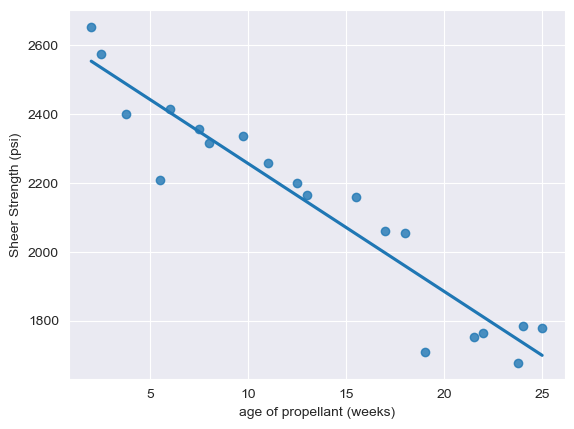

In [17]:
sns.regplot(data=prop, x='age of propellant (weeks)', y = 'Sheer Strength (psi)', ci=None)

***
### Progress Check

In [4]:
df = pd.read_csv('hospital.csv')
df.head()

,state,charge,stay
0,MA,11680,3.64
1,NJ,11630,4.20
2,PA,9850,3.84
3,MN,9950,3.11
4,IN,8490,3.86


In [5]:
x = df['stay']
y = df['charge']

In [6]:
xbar = x.mean()
ybar = y.mean()
SSxx = ((x - xbar)**2).sum()
SSxy = ((x - xbar) * (y - ybar)).sum()
beta1 = SSxy / SSxx
beta0 = ybar - beta1 * xbar




In [8]:
beta0

223.93030064715094

In [7]:
beta1

2884.8766806583353

In [9]:
beta0 + beta1 * 4

11763.437023280492

In [10]:
df.describe()

,charge,stay
count,12.000000,12.000000
mean,10972.500000,3.725833
std,2516.365073,0.282761
min,8440.000000,3.110000
25%,8962.500000,3.562500
50%,10175.000000,3.775000
75%,11975.000000,3.845000
max,16740.000000,4.200000


***
# Lesson 29 - Model Assumptions

In [13]:
prop['predicted'] = prop['age of propellant (weeks)'].apply(lambda xx: beta0 + beta1 * xx)

In [14]:
prop.head()

,Sheer Strength (psi),age of propellant (weeks),predicted
0,2158.70,15.50,44939.518851
1,1678.15,23.75,68739.751466
2,2316.00,8.00,23302.943746
3,2061.30,17.00,49266.833872
4,2207.50,5.50,16090.752044


In [15]:
prop['residual'] = prop['Sheer Strength (psi)'] - prop['predicted']

In [16]:
# Assumption 1 - mean is zero
prop['residual'].mean()

-36641.73744594416

<AxesSubplot:xlabel='age of propellant (weeks)', ylabel='residual'>

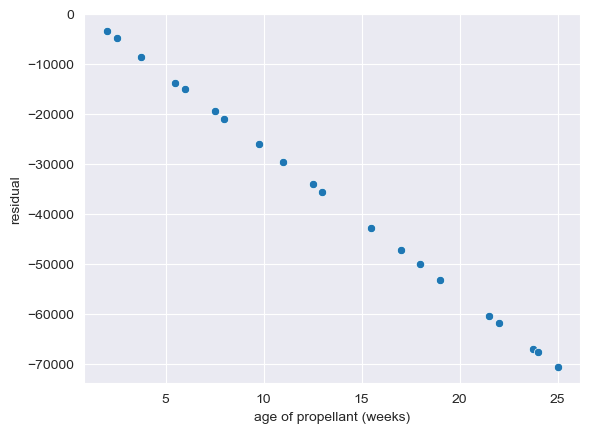

In [17]:
# Assumption 2 - constant variance
sns.scatterplot(data=prop, x='age of propellant (weeks)', y='residual')

In [18]:
# calculate MSE (s^2)
sse = (prop['residual']**2).sum()
sse

36300597370.134964

In [19]:
mse = sse / (len(prop) - 2)
mse

2016699853.8963869

In [20]:
np.sqrt(mse)

44907.68145759016

In [21]:
# Assumption 3 - residuals are normal
len(prop)

20

In [22]:
stats.shapiro(prop['residual'])

ShapiroResult(statistic=0.9389010667800903, pvalue=0.22856320440769196)

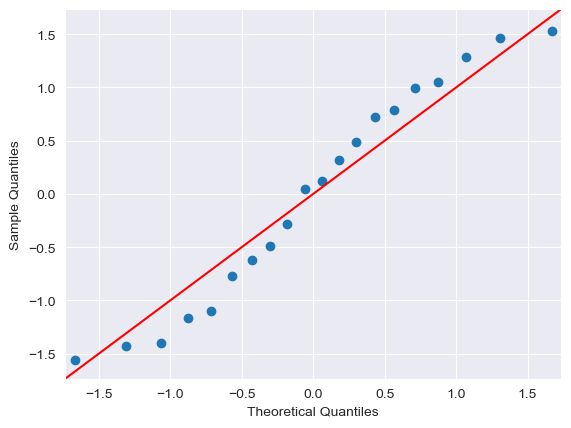

In [24]:

smg.qqplot(data=prop['residual'], fit=True, line='45' )
plt.show()

<AxesSubplot:ylabel='residual'>

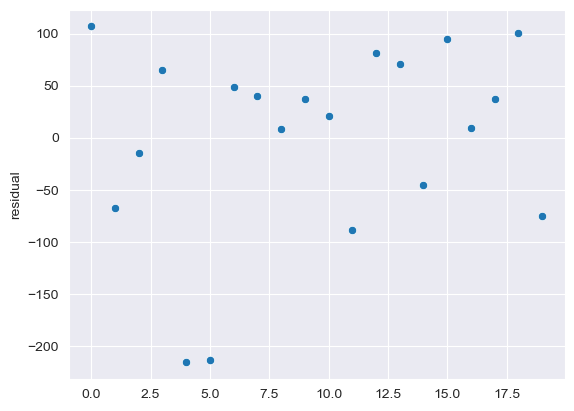

In [30]:
# Assumptions 4 - iid
sns.scatterplot(data=prop, x=prop.index, y='residual')

In [31]:
# remove outliers
prop2 = prop[['age of propellant (weeks)', 'Sheer Strength (psi)']].drop(index=[4,5])

In [32]:
len(prop2)

18

In [33]:
prop_model = smf.ols(formula='Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")',data=prop2).fit()

In [34]:
prop_model.params

Intercept                         2658.972940
Q("age of propellant (weeks)")     -37.693771
dtype: float64

In [35]:
res = prop_model.resid
prop2['residual'] = res

In [36]:
res

0      83.980511
1     -85.595878
2     -41.422772
3      43.121168
6      30.377565
7      10.261488
8     -18.369657
9      12.358541
10     -3.753916
11   -118.071298
12     63.171336
13     45.291328
14    -64.409977
15     73.014939
16    -18.410314
17     12.699198
18     70.614602
19    -94.856863
dtype: float64

In [37]:
res.mean()

8.842309600570136e-14

<AxesSubplot:xlabel='age of propellant (weeks)', ylabel='residual'>

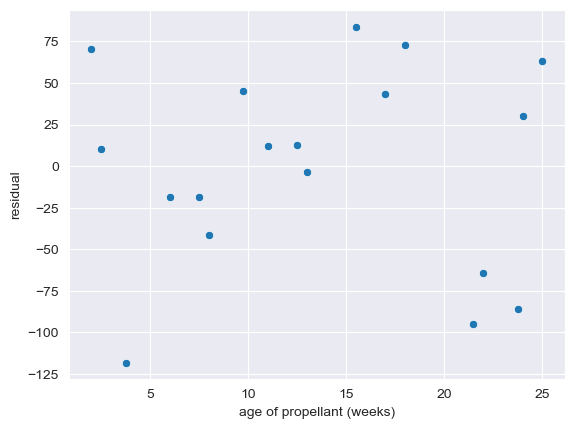

In [38]:
# variance is constant?
sns.scatterplot(data=prop2, x='age of propellant (weeks)', y='residual')

In [40]:
res.var(ddof=2)

3964.628857165011

In [42]:
prop_model.mse_resid

3964.628857165012

In [43]:
# assumption 3 - normal?
stats.shapiro(res)

ShapiroResult(statistic=0.946989893913269, pvalue=0.3797686994075775)

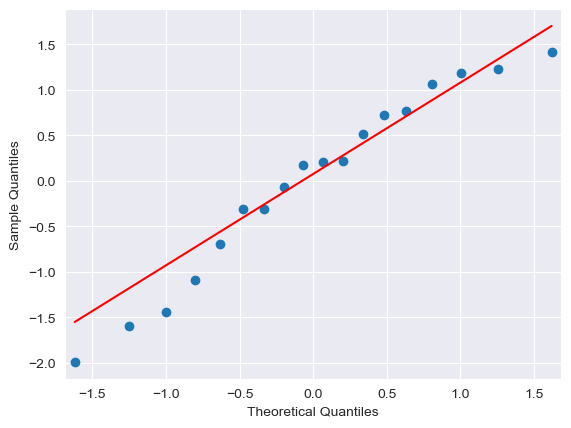

In [44]:
smg.qqplot(res, fit=True, line='q')
plt.show()

<AxesSubplot:>

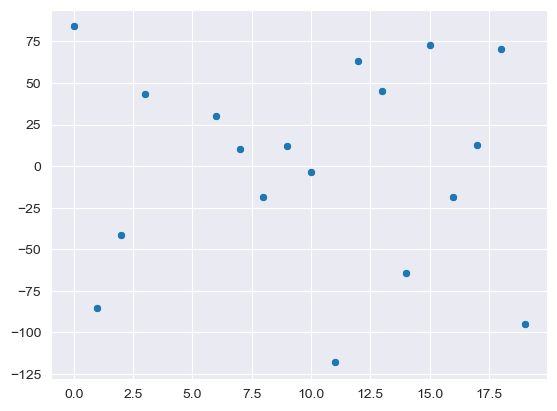

In [45]:
# assumption 4 - iid
sns.scatterplot(x=res.index, y=res)

***
### Progress Check

In [25]:
# hospital data
df = pd.read_csv('hospital.csv')

In [27]:
x = df['stay']
y = df['charge']

xbar = x.mean()
ybar = y.mean()
SSxx = ((x - xbar)**2).sum()
SSxy = ((x - xbar) * (y - ybar)).sum()
SSyy = ((y - ybar)**2).sum()
n = len(df)


beta1 = SSxy / SSxx
beta0 = ybar - beta1 * xbar
mse = (SSyy - beta1 * SSxy) / (n - 2)
print(np.sqrt(mse))

2496.6666530379393


In [31]:
df['predicted'] = df['stay'].apply(lambda xx: beta0 + beta1 * xx)
df['residual'] = df['charge'] - df['predicted']


In [32]:
df['residual'].mean()

1.3642420526593924e-12

In [35]:
model = smf.ols('Q("charge") ~ Q("stay")', data=df).fit()
model.resid.mean()

1.1975013573343555e-11

In [80]:
res = model.resid
res.std(ddof=2)

2496.6666530379393

In [38]:
sse = (df['residual']**2).sum()
np.sqrt(sse / (n-2))

2496.6666530379393

<AxesSubplot:xlabel='stay', ylabel='residual'>

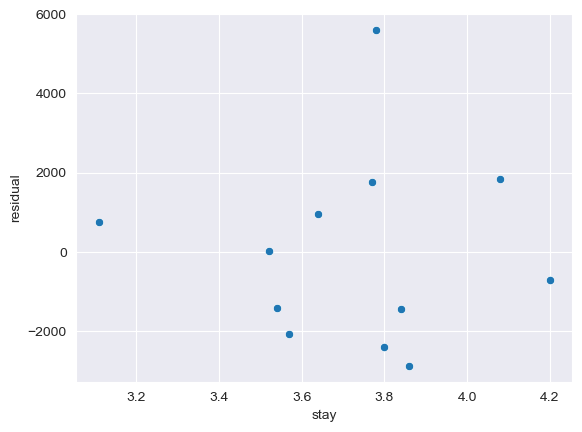

In [40]:
sns.scatterplot(data=df, x='stay', y='residual')

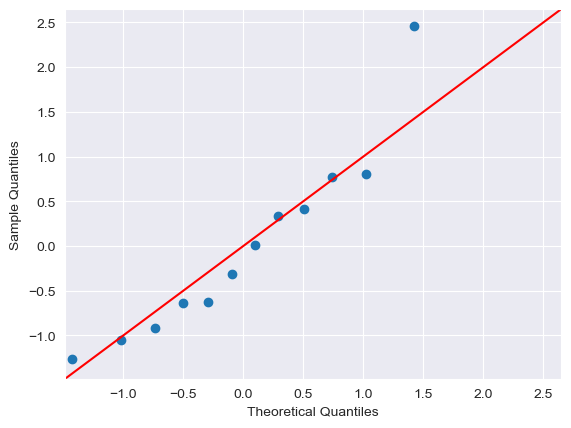

In [43]:
smg.qqplot(data=df['residual'], fit=True, line='45')
plt.show()

In [44]:
stats.shapiro(df['residual'])

ShapiroResult(statistic=0.9153040051460266, pvalue=0.24935904145240784)

***
# Lesson 30 - Inferences About Slope

In [45]:
prop = pd.read_csv('propellant.csv').drop(index=[4,5])

In [46]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sheer Strength (psi)       18 non-null     float64
 1   age of propellant (weeks)  18 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes


In [48]:
prop_model = smf.ols(formula='Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")', data=prop).fit()

In [49]:
prop_model.params

Intercept                         2658.972940
Q("age of propellant (weeks)")     -37.693771
dtype: float64

In [50]:
beta0, beta1 = prop_model.params
print(beta0)
print(beta1)

2658.972939760606
-37.69377102241364


In [51]:
res = prop_model.resid
prop['residual'] = res
pred = prop_model.predict
prop['predicted'] = pred

In [52]:
# calculate sum of squares
x = prop['age of propellant (weeks)']
y = prop['Sheer Strength (psi)']

In [57]:
ss_xx = ((x-x.mean())**2).sum()
ss_xy = ((x-x.mean()) * (y-y.mean())).sum()
ss_yy = ((y-y.mean())**2).sum()

In [58]:
mse = prop_model.mse_resid
sse = mse * (len(prop) - 2)

In [59]:
s_beta1 = (mse**0.5)/(ss_xx**0.5)
s_beta1

1.9786286293901194

In [61]:
# margin of error
moe = stats.t.isf(q=0.025, df=len(prop)-2) * s_beta1
ci = (beta1 - moe, beta1 + moe)
ci

(-41.88827633904816, -33.49926570577912)

In [62]:
# test statistic
t = beta1 / s_beta1
t

-19.050452653175316

In [63]:
p_val = stats.t.sf(abs(t), df=len(prop)-2)
p_val

1.0114883165821557e-12

***
### Progress Check

In [64]:
df = pd.read_csv('hospital.csv')


In [68]:
model = smf.ols(formula='Q("charge") ~ Q("stay")', data=df).fit()
model.summary()

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("charge")   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.174
Date:                Mon, 07 Aug 2023   Prob (F-statistic):              0.304
Time:                        10:01:18   Log-Likelihood:                -109.81
No. Observations:                  12   AIC:                             223.6
Df Residuals:                      10   BIC:                             224.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    223.9303   9945.155      0.023      0.982   -2.19e+04    2.24e+04
Q("stay")   2884.8767   2662.225      1.084      0.304   -3046.929    8816.683
==============================================================================
Omnibus:                        4.670   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.993
Skew:                           0.963   Prob(JB):                        0.369
Kurtosis:                       3.526   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model.conf_int(alpha=0.1)

,0,1
Intercept,-17801.276725,18249.137326
"Q(""stay"")",-1940.301952,7710.055313


In [71]:
x = df['stay']
ss_xx = ((x-x.mean())**2).sum()
mse = model.mse_resid
s_beta1 = np.sqrt(mse) / np.sqrt(ss_xx)
s_beta1

2662.2246247622443

***
# Lesson 31 - Coefficients: Correlation and Determination

In [72]:
prop = pd.read_csv('propellant.csv').drop(index=[4,5])
prop.head()

,Sheer Strength (psi),age of propellant (weeks)
0,2158.70,15.50
1,1678.15,23.75
2,2316.00,8.00
3,2061.30,17.00
6,1784.70,24.00


In [73]:
prop_model = smf.ols(formula='Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")',data=prop).fit()

In [74]:
x = prop['age of propellant (weeks)']
y = prop['Sheer Strength (psi)']

In [75]:
xbar = x.mean()
ybar = y.mean()

In [76]:
ss_xx = ((x-xbar)**2).sum()
ss_xy = ((x-xbar) * (y-ybar)).sum()
ss_yy = ((y-ybar)**2).sum()

In [77]:
pred = prop_model.predict
res = prop_model.resid

In [78]:
sse = (res**2).sum()

In [79]:
mse = sse / (len(prop) - 2)
# alternatively
# mse = res.var(ddof=2)
# mse = prop_model.mse_resid

In [81]:
r = ss_xy / np.sqrt(ss_xx * ss_yy)
r

-0.9786596445662312

In [82]:
rsquared = r**2
rsquared

0.9577746999025021

In [83]:
rsquared = (ss_yy - sse) / ss_yy
rsquared

0.957774699902502

In [84]:
rsquared = 1 - (sse / ss_yy)
rsquared

0.9577746999025019

In [85]:
prop_model.rsquared

0.9577746999025019

***
### Progress Check

In [86]:
df = pd.read_csv('hospital.csv')

In [87]:
model = smf.ols('Q("charge") ~ Q("stay")', data=df).fit()

In [88]:
model.summary()

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("charge")   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.174
Date:                Mon, 07 Aug 2023   Prob (F-statistic):              0.304
Time:                        10:28:17   Log-Likelihood:                -109.81
No. Observations:                  12   AIC:                             223.6
Df Residuals:                      10   BIC:                             224.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    223.9303   9945.155      0.023      0.982   -2.19e+04    2.24e+04
Q("stay")   2884.8767   2662.225      1.084      0.304   -3046.929    8816.683
==============================================================================
Omnibus:                        4.670   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.993
Skew:                           0.963   Prob(JB):                        0.369
Kurtosis:                       3.526   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
x = df['stay']
y = df['charge']
ss_xx = ((x-x.mean())**2).sum()
ss_xy = ((x-x.mean()) * (y-y.mean())).sum()
ss_yy = ((y-y.mean())**2).sum()
r = ss_xy / np.sqrt(ss_xx * ss_yy)
r

0.32417022793926503

In [90]:
r**2

0.10508633668219505

In [91]:
t = r * np.sqrt(len(df)-2) / np.sqrt(1-r**2)
t

1.0836338353364814

In [92]:
2 * stats.t.sf(abs(t), df=len(df)-2)

0.30396238744579435

***
# Lesson 32 - Estimation and Prediction

In [108]:
prop = pd.read_csv('propellant.csv').drop(index=[4,5])

In [109]:
prop_model = smf.ols(formula='Q("Sheer Strength (psi)") ~ Q("age of propellant (weeks)")',data=prop).fit()

In [110]:
x = prop['age of propellant (weeks)']
y = prop['Sheer Strength (psi)']

In [111]:
mse = prop_model.mse_resid

In [112]:
s = np.sqrt(mse)

In [113]:
xbar = x.mean()
ss_xx = ((x-xbar)**2).sum()


In [114]:
n = len(prop)

In [115]:
beta0, beta1 = prop_model.params

In [116]:
tcrit = stats.t.isf(q=0.025, df = n-2)

In [142]:
def s_est(xp):
    return s * np.sqrt(1/n + (xp-xbar)**2 / ss_xx)

In [143]:
def s_pred(xp):
    return s * np.sqrt(1 + 1/n + (xp-xbar)**2 / ss_xx)

In [144]:
def y_hat(xp):
    return beta0 + beta1 * xp

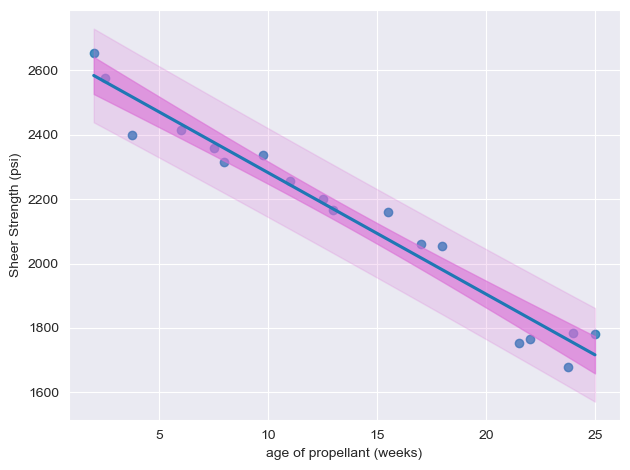

In [145]:
# graph intervals on the scatterplot
fig, ax = plt.subplots()
sns.regplot(data=prop, x='age of propellant (weeks)', y='Sheer Strength (psi)', ci=None, ax=ax)

x_rng = np.linspace(x.min(),x.max(),100)
ei_lower = [(y_hat(xp) - tcrit * s_est(xp)) for xp in x_rng]
ei_upper = [(y_hat(xp) + tcrit * s_est(xp)) for xp in x_rng]
ax.fill_between(x_rng, ei_lower, ei_upper, color='orchid', alpha=0.6)

pi_lower = [(y_hat(xp) - tcrit * s_pred(xp)) for xp in x_rng]
pi_upper = [(y_hat(xp) + tcrit * s_pred(xp)) for xp in x_rng]
ax.fill_between(x_rng, pi_lower, pi_upper, color='orchid', alpha=0.2)

fig.tight_layout()

In [147]:
prop_model.summary2(alpha=0.1)

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                   OLS                          Adj. R-squared:        0.955   
Dependent Variable:      Q("Sheer Strength (psi)")    AIC:                   202.0947
Date:                    2023-08-07 12:09             BIC:                   203.8755
No. Observations:        18                           Log-Likelihood:        -99.047 
Df Model:                1                            F-statistic:           362.9   
Df Residuals:            16                           Prob (F-statistic):    2.02e-12
R-squared:               0.958                        Scale:                 3964.6  
-------------------------------------------------------------------------------------
                                 Coef.   Std.Err.    t     P>|t|    [0.05     0.95]  
-------------------------------------------------------------------------------------
Intercept                      2658.9729  30.5335  87.0839 0.0000 2605.6650 2712.2808
Q("age of propellant (weeks)")  -37.6938   1.9786 -19.0505 0.0000  -41.1482  -34.2393
-------------------------------------------------------------------------------------
Omnibus:                     1.422               Durbin-Watson:                 2.485
Prob(Omnibus):               0.491               Jarque-Bera (JB):              1.164
Skew:                        -0.448              Prob(JB):                      0.559
Kurtosis:                    2.133               Condition No.:                 32   
=====================================================================================

"""

In [156]:
dfpred = pd.DataFrame({'age of propellant (weeks)':[10,15]})
dfpred

,age of propellant (weeks)
0,10
1,15


In [157]:
prediction = prop_model.get_prediction(dfpred)

In [158]:
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2282.035230,16.365686,2247.341524,2316.728935,2144.119715,2419.950744
1,2093.566374,15.140334,2061.470299,2125.662449,1956.281291,2230.851458


In [159]:
dfpred = dfpred.join(prediction.summary_frame(alpha=0.05))

In [160]:
dfpred

,age of propellant (weeks),mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10,2282.035230,16.365686,2247.341524,2316.728935,2144.119715,2419.950744
1,15,2093.566374,15.140334,2061.470299,2125.662449,1956.281291,2230.851458


***
### Progress Check

In [161]:
df = pd.read_csv('hospital.csv')
model = smf.ols('Q("charge") ~ Q("stay")', data=df).fit()

In [165]:
dfpred = pd.DataFrame({'stay': [4.1]})
model.get_prediction(dfpred).summary_frame(alpha=0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12051.924691,1229.508796,9823.487798,14280.361585,7007.862562,17095.986821


In [166]:
model.get_prediction(dfpred).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12051.924691,1229.508796,9312.408374,14791.441009,5851.03538,18252.814002


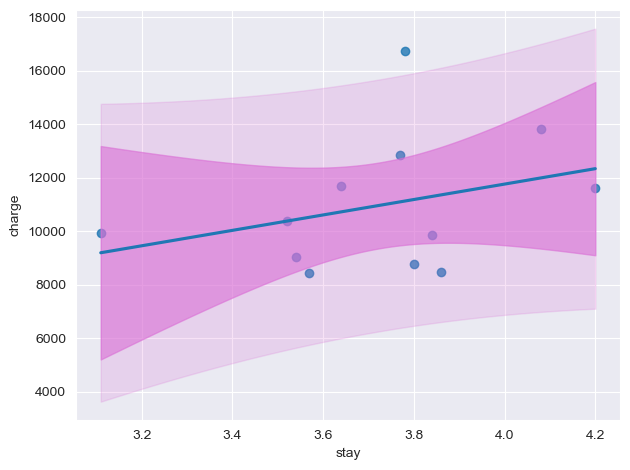

In [172]:
x = df['stay']
xrng = np.linspace(x.min(),x.max(),100)
dfpred = pd.DataFrame({'stay':xrng})
prediction = model.get_prediction(dfpred)
dfpred1 = dfpred.join(prediction.summary_frame(alpha=0.05))
dfpred2 = dfpred.join(prediction.summary_frame(alpha=0.1))
ei_lower = dfpred1['mean_ci_lower']
ei_upper = dfpred1['mean_ci_upper']
pi_lower = dfpred2['obs_ci_lower']
pi_upper = dfpred2['obs_ci_upper']


fig,ax = plt.subplots()
sns.regplot(data=df, x='stay', y='charge', ax=ax, ci=None)

ax.fill_between(xrng, ei_lower, ei_upper, color='orchid', alpha=0.6)
ax.fill_between(xrng, pi_lower, pi_upper, color='orchid', alpha=0.2)


fig.tight_layout()